In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset Description

The **Coffee Shop Sales** dataset contains detailed records of sales transactions from a coffee shop chain. Each row represents a single transaction, capturing information about the product sold, the store location, and the transaction details.

### Columns

- <span style="color:#2ca02c"><b>transaction_id</b></span>: Unique identifier for each transaction.
- <span style="color:#1f77b4"><b>transaction_date</b></span>: The date when the transaction occurred.
- <span style="color:#ff7f0e"><b>transaction_time</b></span>: The time when the transaction occurred.
- <span style="color:#8c564b"><b>transaction_qty</b></span>: Number of items sold in the transaction.
- <span style="color:#17becf"><b>store_location</b></span>: The location of the store where the transaction took place.
- <span style="color:#e377c2"><b>unit_price</b></span>: Price per unit of the product sold.
- <span style="color:#bcbd22"><b>product_category</b></span>: Category of the product (e.g., Beverage, Food).
- <span style="color:#7f7f7f"><b>product_type</b></span>: Type of product (e.g., Coffee, Tea, Pastry).

This dataset enables analysis of sales trends, product performance, store comparisons, and customer purchasing patterns.

In [2]:
store=pd.read_excel(r'C:\Users\User\OneDrive\Desktop\DATA-SCIENCE\coffee-project\Coffee Shop Sales.xlsx')
df=store.copy()

# DATA CLEANING

In [3]:
#Missing value
print("---------Missing Value-----------------")
df = df.drop(['store_id', 'product_id', 'product_detail'], axis=1)
for i in range(df.shape[1]):
    print(f'{df.columns[i]} : {df.iloc[:,i].isnull().sum()}')
    

---------Missing Value-----------------
transaction_id : 0
transaction_date : 0
transaction_time : 0
transaction_qty : 0
store_location : 0
unit_price : 0
product_category : 0
product_type : 0


In [4]:
df.describe()

,transaction_id,transaction_date,transaction_qty,unit_price
count,149116.000000,149116,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,45.000000
std,43153.600016,NaN,0.542509,2.658723


**Numerical Columns:** `transaction_qty`, `unit_price`  
**Categorical Columns:** : `transaction_id`, `transaction_date`, `transaction_time`,`store_location`, `product_category`, `product_type`

<Axes: xlabel='transaction_qty', ylabel='unit_price'>

<Axes: xlabel='transaction_qty', ylabel='unit_price'>

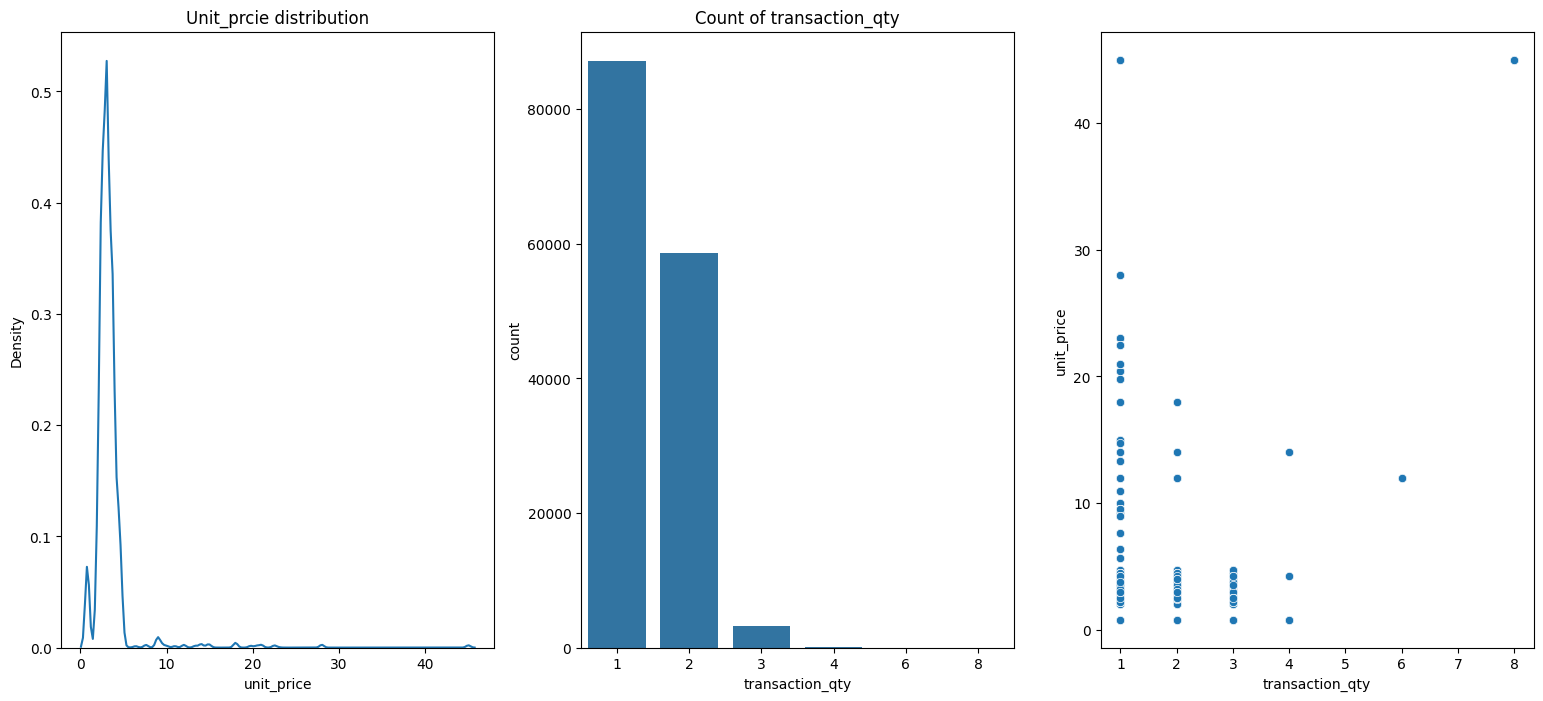

In [5]:
#Numerical 
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(19,8))
sns.kdeplot(data=df,x='unit_price',ax=ax[0])
ax[0].set_title('Unit_prcie distribution')
sns.countplot(data=df,x='transaction_qty',ax=ax[1])
ax[1].set_title('Count of transaction_qty')
sns.scatterplot(data=df,x='transaction_qty',y='unit_price',ax=ax[2])

In [6]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea


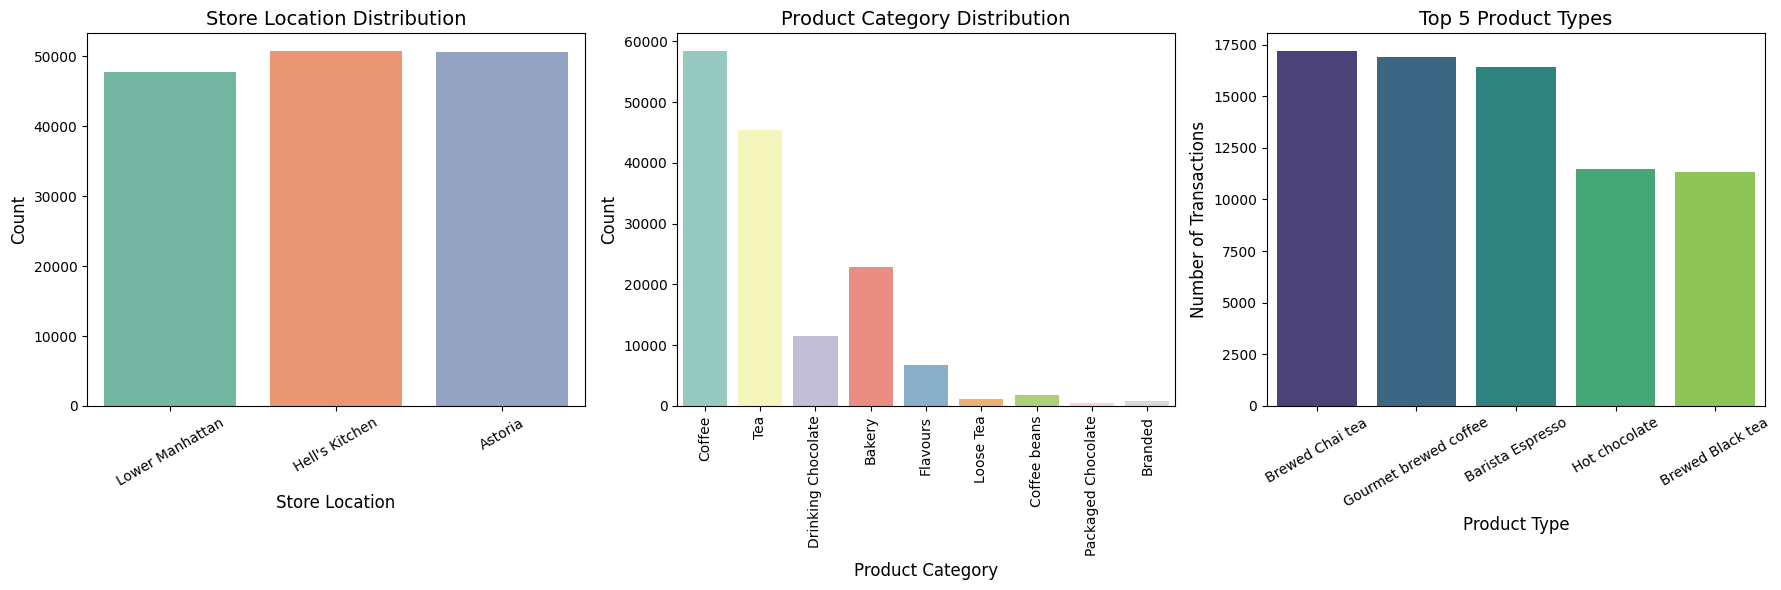

In [7]:
#Catergorcial Univeriant
top5 = df['product_type'].value_counts().head(5)
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))

# Store Location
sns.countplot(data=df, x='store_location', ax=ax[0], palette='Set2')
ax[0].set_title('Store Location Distribution', fontsize=14)
ax[0].set_xlabel('Store Location', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].tick_params(axis='x', rotation=30)

# Product Category
sns.countplot(data=df, x='product_category', ax=ax[1], palette='Set3')
ax[1].set_title('Product Category Distribution', fontsize=14)
ax[1].set_xlabel('Product Category', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].tick_params(axis='x', rotation=90)

# Top 5 Product Types
sns.barplot(x=top5.index, y=top5.values, ax=ax[2], palette='viridis')
ax[2].set_title('Top 5 Product Types', fontsize=14)
ax[2].set_xlabel('Product Type', fontsize=12)
ax[2].set_ylabel('Number of Transactions', fontsize=12)
ax[2].tick_params(axis='x', rotation=30)

for i in range(3):
    for label in ax[i].get_xticklabels():
        label.set_fontsize(10)
    for label in ax[i].get_yticklabels():
        label.set_fontsize(10)

plt.tight_layout()
plt.show()

In [8]:
store=pd.pivot_table(data=df,index=df['store_location'],values=df[['unit_price','transaction_qty']],aggfunc=sum)

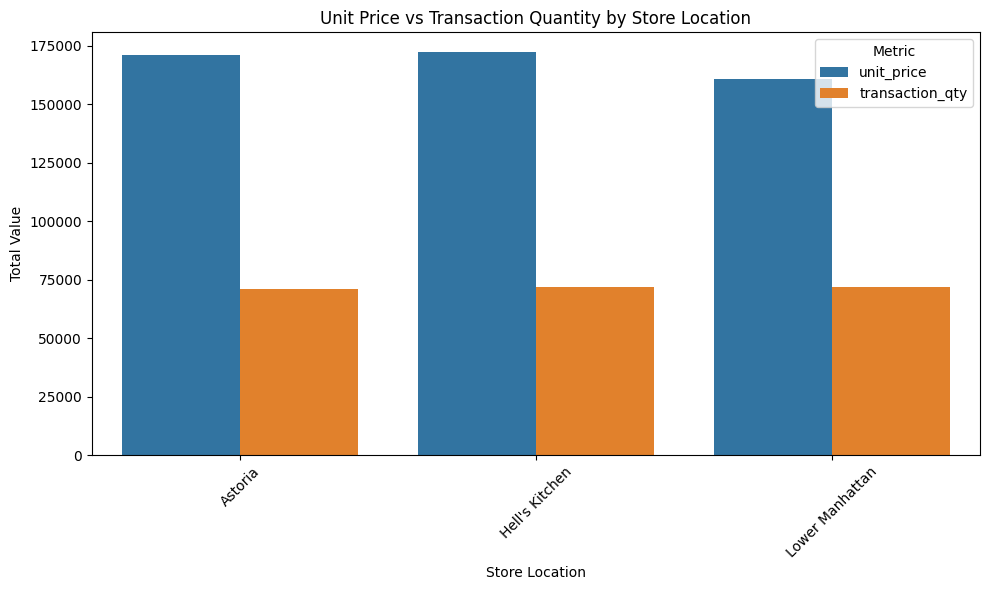

In [9]:
store_reset = store.reset_index()
store_melted = pd.melt(store_reset,
                       id_vars='store_location',
                       value_vars=['unit_price', 'transaction_qty'],
                       var_name='Metric',
                       value_name='Value')

# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=store_melted, x='store_location', y='Value', hue='Metric')
plt.title('Unit Price vs Transaction Quantity by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Value')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
store.reset_index(columns=['month'])


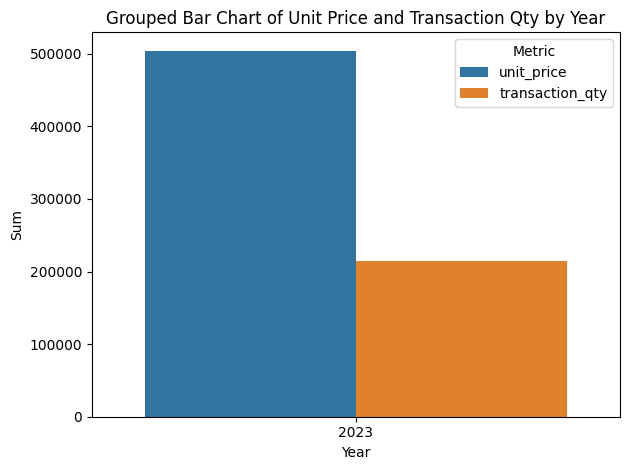

In [35]:
sns.barplot(data=melted_df, x='year', y='Value', hue='Metric')
plt.title('Grouped Bar Chart of Unit Price and Transaction Qty by Year')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.tight_layout()
plt.show()

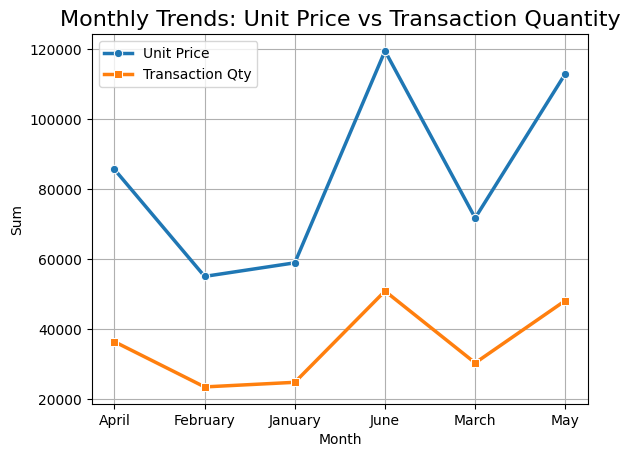

In [48]:
monthly=df.groupby('month')[['unit_price','transaction_qty']].sum().reset_index()
sns.lineplot(data=monthly, x='month', y='unit_price', label='Unit Price', marker='o', linewidth=2.5)
sns.lineplot(data=monthly, x='month', y='transaction_qty', label='Transaction Qty', marker='s', linewidth=2.5)
plt.title('Monthly Trends: Unit Price vs Transaction Quantity', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sum')
plt.grid()
plt.show()

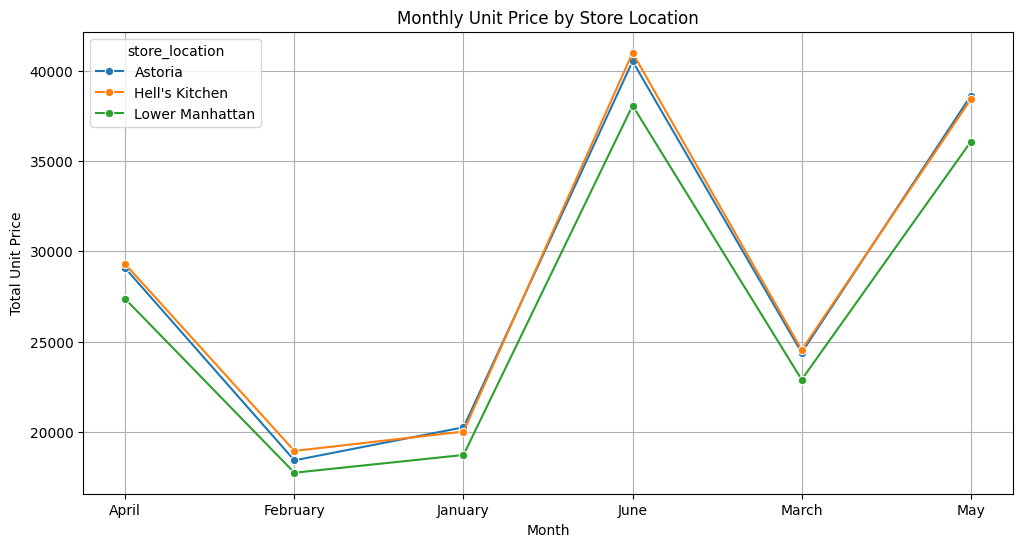

In [53]:
grouped = df.groupby(['store_location', 'month'])['unit_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='month', y='unit_price', hue='store_location', marker='o')

plt.title('Monthly Unit Price by Store Location')
plt.xlabel('Month')
plt.ylabel('Total Unit Price')
plt.grid()
plt.show()

In [72]:
grouped_df = df.groupby('product_category')[['unit_price', 'transaction_qty']].sum().reset_index()
top5 = grouped_df.sort_values('transaction_qty', ascending=False).head(5)
melted_top5 = top5.melt(id_vars='product_category', 
                        value_vars=['unit_price', 'transaction_qty'],
                        var_name='Metric', 
                        value_name='Value')


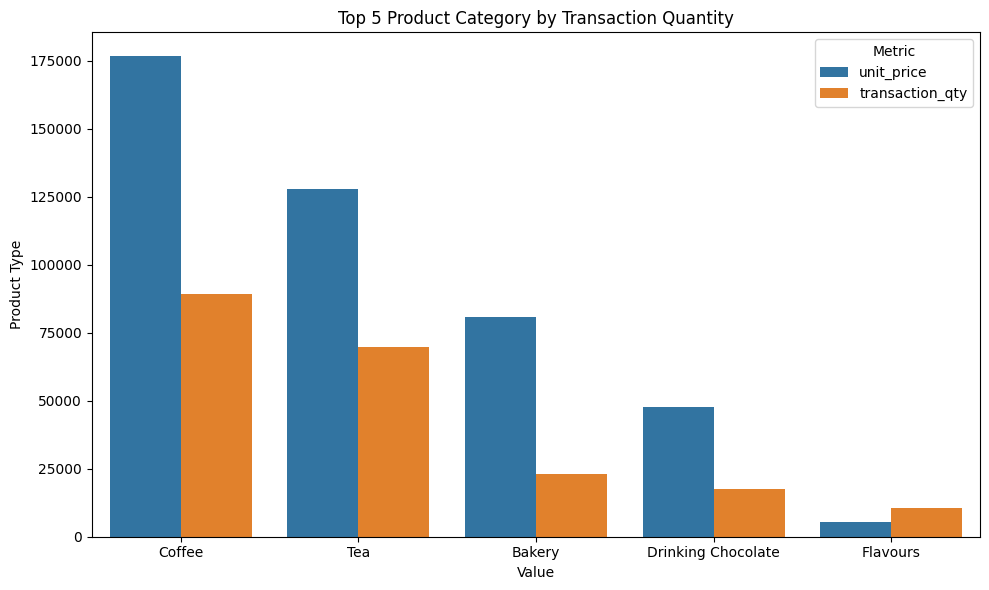

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_top5, 
            x='product_category', 
            y='Value', 
            hue='Metric')

plt.title('Top 5 Product Category by Transaction Quantity')
plt.xlabel('Value')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()

In [75]:
heatmap_data = df.groupby(['store_location', 'product_type'])['transaction_qty'].sum().reset_index()


In [76]:
heatmap_data

,store_location,product_type,transaction_qty
0,Astoria,Barista Espresso,7345
1,Astoria,Biscotti,1955
2,Astoria,Black tea,85
3,Astoria,Brewed Black tea,5891
4,Astoria,Brewed Chai tea,9306
...,...,...,...
82,Lower Manhattan,Premium Beans,93
83,Lower Manhattan,Premium brewed coffee,4156
84,Lower Manhattan,Regular syrup,3268
85,Lower Manhattan,Scone,3656


In [78]:
pivot_data = heatmap_data.pivot(index='store_location', columns='product_type', values='transaction_qty')
pivot_data

product_type,Barista Espresso,Biscotti,Black tea,Brewed Black tea,Brewed Chai tea,Brewed Green tea,Brewed herbal tea,Chai tea,Clothing,Drinking Chocolate,...,Housewares,Organic Beans,Organic Chocolate,Organic brewed coffee,Pastry,Premium Beans,Premium brewed coffee,Regular syrup,Scone,Sugar free syrup
store_location,,,,,,,,,,,,,,,,,,,,,
Astoria,7345,1955,85,5891,9306,2898,5953,120,111,60,...,168,91,50,4344,2252,96,4451,1639,3289,567
Hell's Kitchen,9064,1858,119,5664,8755,3006,5555,181,24,115,...,95,162,82,4518,2300,217,3824,2699,3520,897
Lower Manhattan,8534,1975,99,5907,8189,2793,5820,142,86,91,...,292,167,89,4150,2409,93,4156,3268,3656,1441


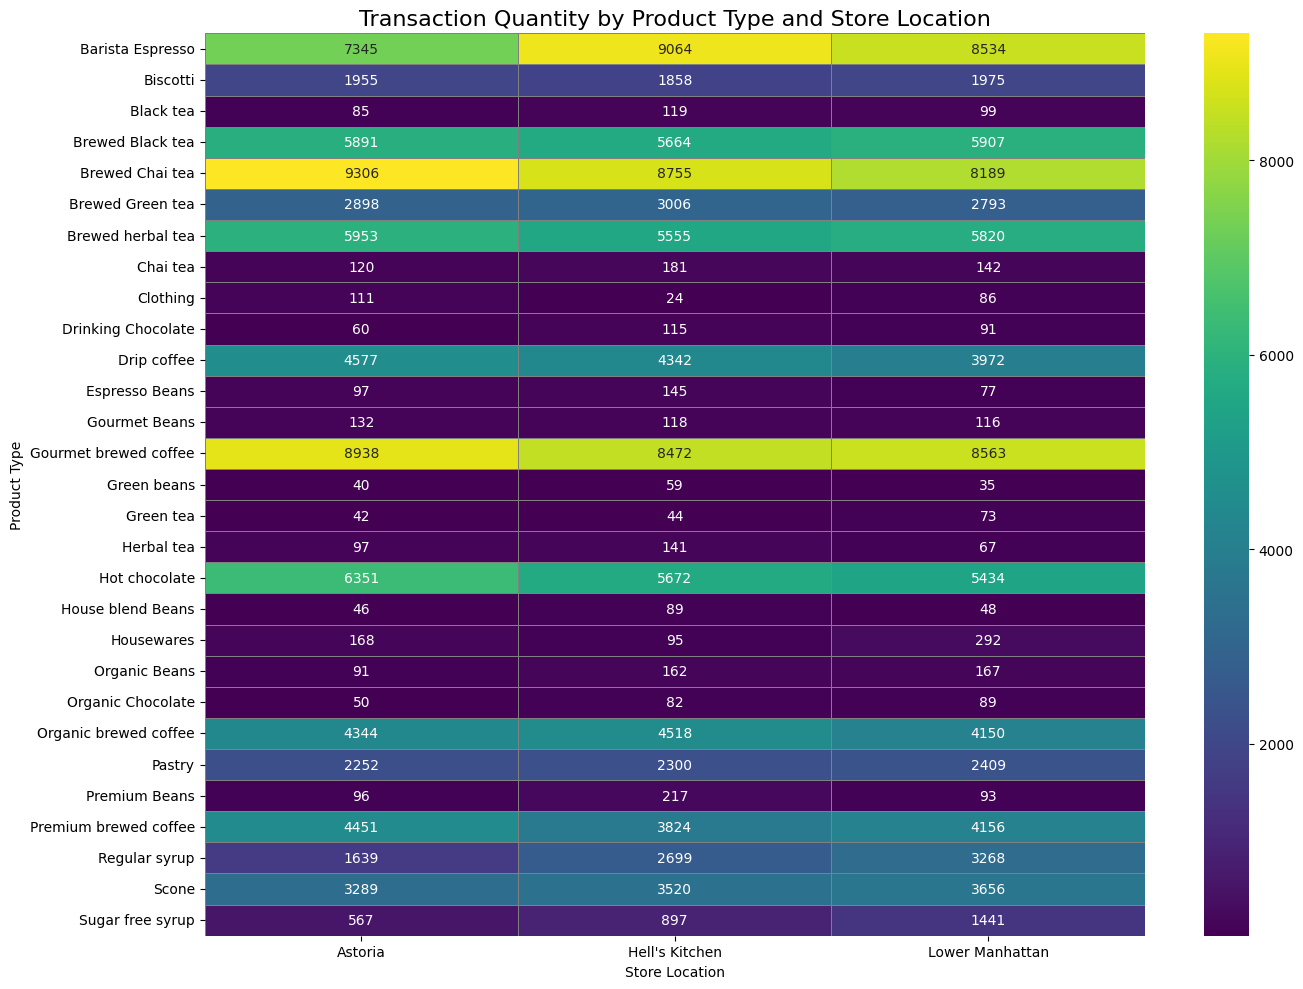

In [ ]:
heatmap_data = df.groupby(['product_type', 'store_location'])['transaction_qty'].sum().reset_index()
pivot_data = heatmap_data.pivot(index='product_type', columns='store_location', values='transaction_qty')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, annot=True, fmt='.0f',cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Transaction Quantity by Product Type and Store Location', fontsize=16)
plt.xlabel('Store Location')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()


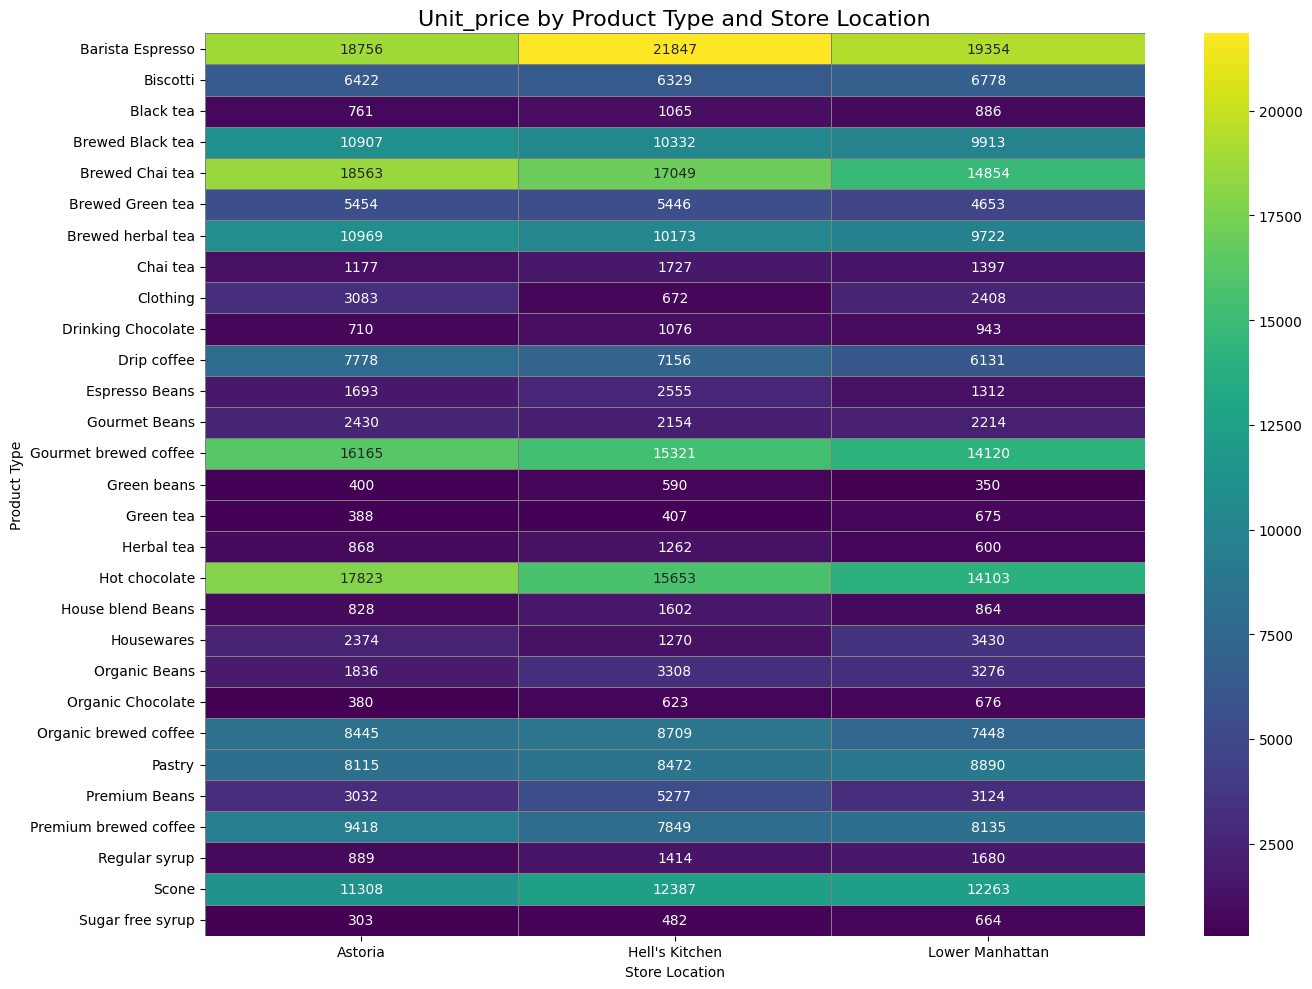

In [85]:
heatmap_data = df.groupby(['product_type', 'store_location'])['unit_price'].sum().reset_index()
pivot_data = heatmap_data.pivot(index='product_type', columns='store_location', values='unit_price')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, annot=True, fmt='.0f',cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Unit_price by Product Type and Store Location', fontsize=16)
plt.xlabel('Store Location')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()


In [91]:
df.drop(['transaction_time', 'hour', 'time_of_day'], axis=1, inplace=True)



In [92]:
df.head()

,transaction_id,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,day,month,year
0,1,2023-01-01,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,1,January,2023
1,2,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,1,January,2023
2,3,2023-01-01,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,1,January,2023
3,4,2023-01-01,1,Lower Manhattan,2.0,Coffee,Drip coffee,1,January,2023
4,5,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,1,January,2023


# Coffee Shop Sales EDA Report

## Introduction
This report presents an exploratory data analysis (EDA) of the Coffee Shop Sales dataset. The objective is to uncover sales trends, product performance, and store comparisons to provide actionable business insights.

## Data Overview
- The dataset contains detailed records of sales transactions from a coffee shop chain.
- Each row represents a single transaction, including product, store location, and transaction details.

## Data Cleaning
- Dropped irrelevant columns: `store_id`, `product_id`, `product_detail`.
- Checked for and reported missing values.
- Converted `transaction_date` to datetime and extracted `day`, `month`, and `year` for time-based analysis.

## Univariate Analysis
- **Numerical Columns:**
  - `unit_price` and `transaction_qty` distributions visualized using KDE and count plots.
- **Categorical Columns:**
  - Frequency of `store_location`, `product_category`, and `product_type` visualized using count and bar plots.
  - Top 5 product types identified by transaction count.

## Bivariate and Grouped Analysis
- **Store Performance:**
  - Bar plots and grouped bar plots show total sales and transaction quantity by store location.
- **Time Trends:**
  - Line plots reveal monthly and yearly trends in sales and transaction quantity.
  - Grouped bar plots compare yearly totals for key metrics.
- **Product Analysis:**
  - Top product categories and types identified by sales and transaction quantity.
- **Heatmaps:**
  - Visualized transaction quantity and unit price by product type and store location.

## Key Insights
- Certain store locations and product types consistently outperform others in both sales and transaction quantity.
- Sales and transaction quantities show clear monthly and yearly trends, with some months/years outperforming others.
- Product category and type analysis highlights the most popular and profitable items.

## Recommendations
- Focus marketing and inventory on top-performing stores and product types.
- Investigate underperforming locations or products for improvement opportunities.
- Use time-based trends to plan promotions and staffing during peak periods.

## Next Steps
- Consider deeper customer segmentation if customer data is available.
- Explore predictive modeling for sales forecasting.
- Develop dashboards for ongoing monitoring.